<a href="https://colab.research.google.com/github/cindyhps/google_collab/blob/main/hargatablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Tablet.csv'
dataset = pd.read_csv(file_path)

<ipython-input-70-d91b8e5ddb74>:2: DtypeWarning: Columns (0,1,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file_path)


Data Cleaning

In [ ]:
dataset = dataset.dropna(subset=['price'])

In [ ]:
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)

In [ ]:
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column].astype(str))

In [ ]:
X = dataset[['ram', 'battery_capacity', 'primary_front_camera', 'primary_rear_camera']]
y = dataset['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scalling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Regulasi
model = Ridge(alpha=1.0)  # Adjust alpha as needed
model.fit(X_train, y_train)

Ridge()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Modeling

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Step 6: Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Prediksi dan Evaluasi

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 16146.577894667626
Mean Squared Error: 628947137.7404535
R-squared: 0.6751726153666887


Visualisasi

In [ ]:
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores

In [ ]:
print("Mean Squared Error (MSE) Scores:", mse_scores)
print("Average MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

Mean Squared Error (MSE) Scores: [6.28947138e+08 7.65156155e+08 9.25939794e+08 5.71143329e+08
 4.57944461e+08]
Average MSE: 669826175.1618693
Standard Deviation of MSE: 161855028.4780415


(Cross Validasi untuk mengecek apakah cukup tervalidasi atau tidak)

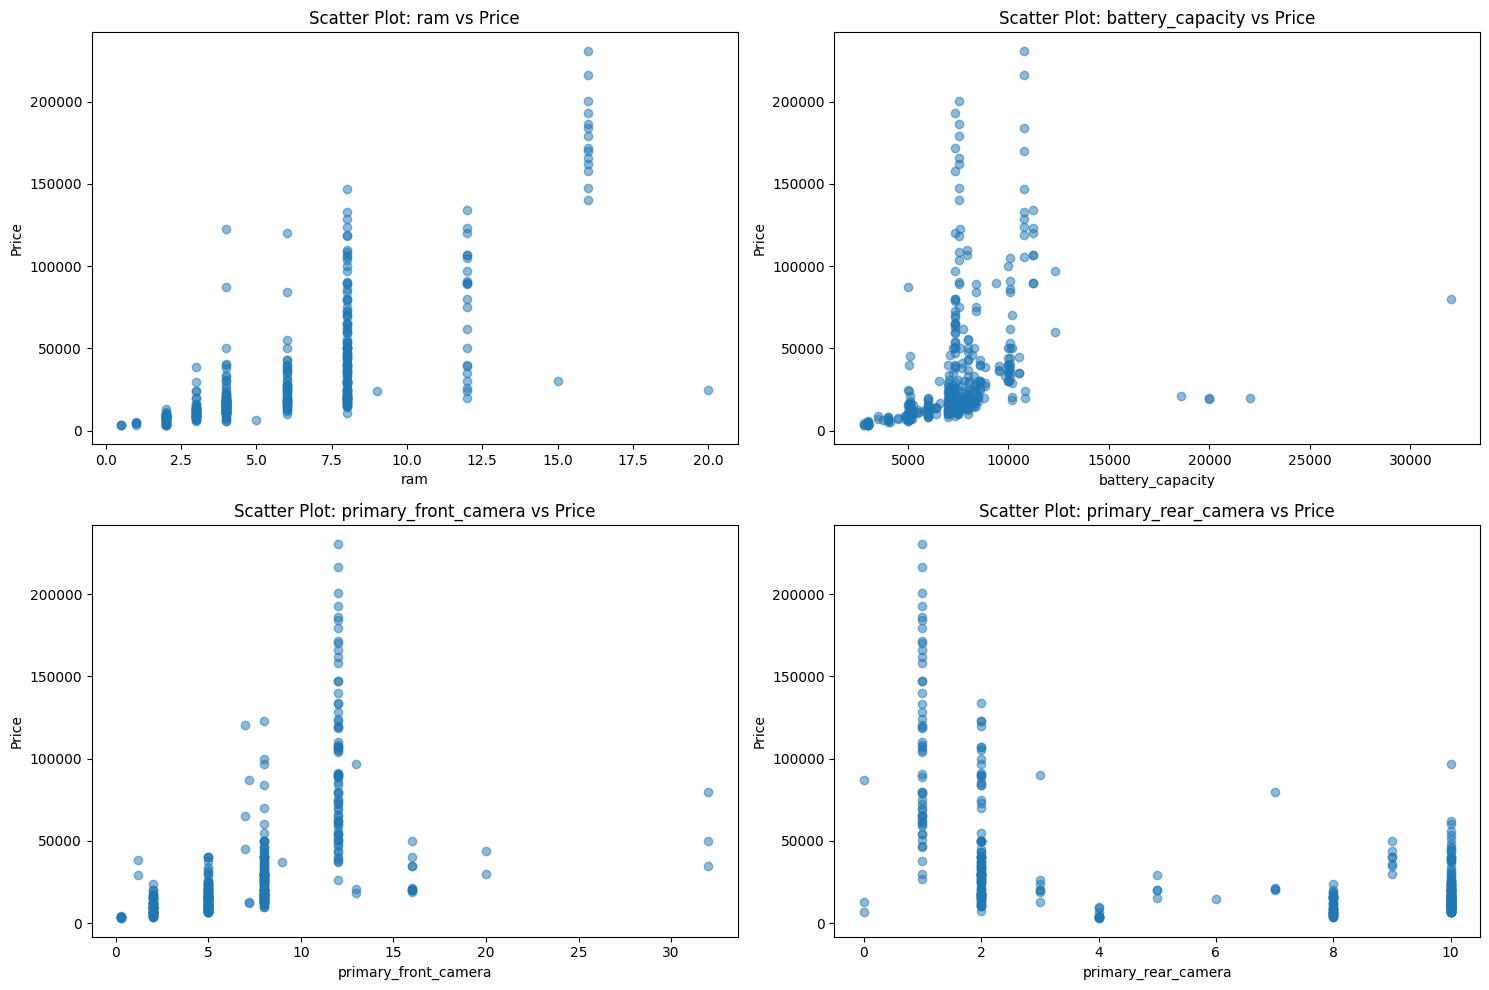

In [ ]:
features = ['ram', 'battery_capacity', 'primary_front_camera', 'primary_rear_camera']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(dataset[feature], dataset['price'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


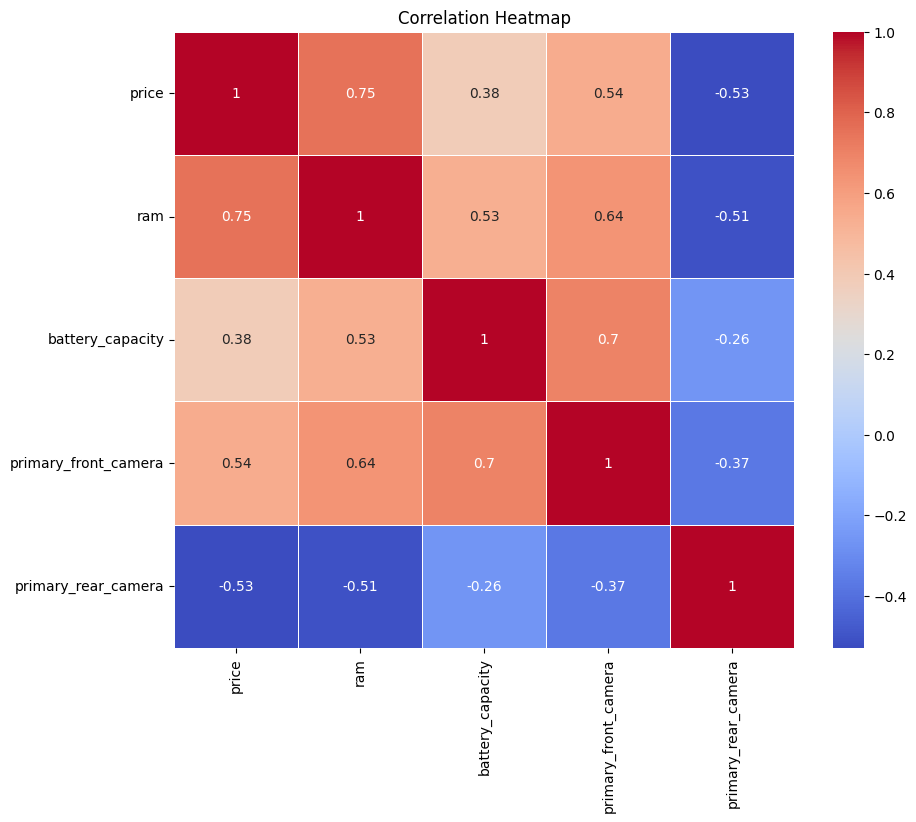

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset[['price', 'ram', 'battery_capacity', 'primary_front_camera', 'primary_rear_camera']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()